In [1]:
from difference_ses_model import PredPrey

/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/connectors/__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/connectors/__init__.py:29: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/connectors/__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)


In [28]:
from ema_workbench import ema_logging, load_results
from ema_workbench import Model, RealParameter, CategoricalParameter, TimeSeriesOutcome, perform_experiments
import numpy as np
from ema_workbench.analysis.plotting import lines, Density
#from ema_workbench.em_framework.evaluators import LHS

from ema_workbench.em_framework.evaluators import Samplers

ema_logging.log_to_stderr(ema_logging.INFO)

#We can define common uncertainties and outcomes for each model:
uncertainties = [RealParameter('rmax', 0.7, 1.8),
                 RealParameter('K', 625000000, 4400000000),
                 RealParameter('initial_gamma', 175, 525),
                 RealParameter('demand_mult', 1.2, 1.5),
                 RealParameter('cost', 15000, 45000),
                 RealParameter('m', 0.35, 1),
                 RealParameter('alpha', 0.001, 0.3),
                 RealParameter('env', 0.2, 0.8),
                 RealParameter('lobby', 1.2, 2),
                 RealParameter('q_a', 0.15, 0.45),
                 RealParameter('pl', 2000, 20000),
                 RealParameter('q_e', 50, 350),
                 RealParameter('beta', 0.00000004, 0.00003),
                 RealParameter('scc', 100, 500),#base on confidence interval
                 RealParameter('pl', 10, 30),#base on confidence interval

                 #RealParameter('lobby', 1.2, 2),
                ] 

outcomes = [TimeSeriesOutcome('TIME', function = np.squeeze),
            TimeSeriesOutcome('effort', function = np.squeeze),
            TimeSeriesOutcome('meeso', function = np.squeeze),
            TimeSeriesOutcome('catch', function = np.squeeze),
            TimeSeriesOutcome('sequestration', function = np.squeeze),
            TimeSeriesOutcome('cumulative_social_cost', function = np.squeeze),
            TimeSeriesOutcome('sequestration_pristine', function = np.squeeze),
            TimeSeriesOutcome('profit', function = np.squeeze),
           ]


#Define the Python model
py_model = Model('Python', function=PredPrey)
py_model.uncertainties = uncertainties
py_model.outcomes = outcomes

In [29]:
from ema_workbench import (SequentialEvaluator, save_results,
                          MultiprocessingEvaluator)
#nr_experiments = 100


with SequentialEvaluator(py_model) as evaluator: 
   results = evaluator.perform_experiments(scenarios=100000, uncertainty_sampling=Samplers.LHS)

#with MultiprocessingEvaluator(py_model) as evaluator:
    # results = perform_experiments(py_model, nr_experiments, evaluator=evaluator)


save_results(results, 'Data/results.tar.gz')

[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
100%|█████████████████████████████████| 100000/100000 [07:31<00:00, 221.49it/s]
[MainProcess/INFO] experiments finished
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/em_framework/outcomes.py:496: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
[MainProcess/INFO] results saved successfully to /home/maartjeoostdijk/Documents/SES-model/Data/results.tar.gz


In [30]:
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis.plotting import kde_over_time
import seaborn as sns

ema_logging.log_to_stderr(ema_logging.INFO)

file_name = 'Data/results.tar.gz' 

experiments, outcomes = load_results(file_name)

[MainProcess/INFO] results loaded successfully from /home/maartjeoostdijk/Documents/SES-model/Data/results.tar.gz


In [31]:
print(results)


(                  K     alpha          beta          cost  demand_mult  \
0      2.024042e+09  0.236018  3.329480e-06  16020.079047     1.250905   
1      2.830316e+09  0.088411  2.993567e-05  42987.980309     1.333861   
2      2.266021e+09  0.175150  1.831449e-05  42085.989472     1.467586   
3      2.126596e+09  0.238235  7.225525e-06  43340.832633     1.393875   
4      1.055551e+09  0.153668  1.174609e-05  28598.253771     1.447065   
...             ...       ...           ...           ...          ...   
99995  1.417572e+09  0.023712  2.876640e-06  43503.287034     1.235048   
99996  4.287411e+09  0.195690  1.028935e-05  30600.145073     1.282791   
99997  1.047763e+09  0.231035  2.033548e-07  44975.141516     1.325528   
99998  4.028054e+09  0.108662  4.118948e-06  18098.856983     1.429586   
99999  8.250953e+08  0.114741  2.523785e-05  22240.854351     1.250040   

            env  initial_gamma     lobby         m         pl       q_a  \
0      0.281070     341.299944  1.9

NameError: name 'plt' is not defined

  0%|                                                | 0/10000 [03:08<?, ?it/s]


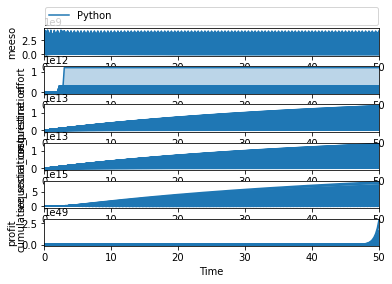

In [9]:
experiments_to_show = np.arange(0, experiments.shape[0], 1)
experiments_to_show
lines(experiments, outcomes, outcomes_to_show=('meeso','effort', 'sequestration','sequestration_pristine',
                                              'cumulative_social_cost', 'profit'), group_by='model',
     show_envelope=True, titles=None, 
     experiments_to_show=experiments_to_show)
plt.show()

NameError: name 'plt' is not defined

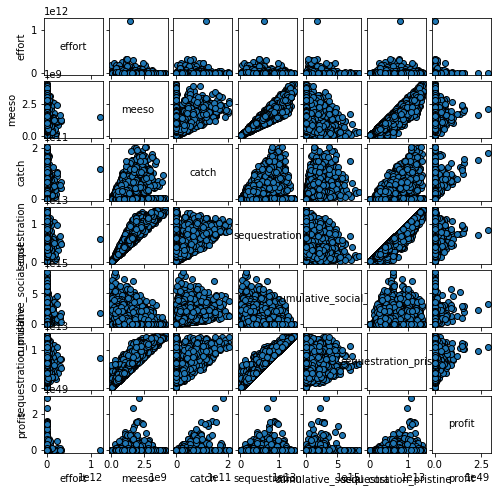

In [10]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by="policy", legend=False)
fig.set_size_inches(8, 8)
plt.show()



[MainProcess/WARNING] singular matrix
/home/maartjeoostdijk/.local/lib/python3.10/site-packages/ema_workbench/analysis/plotting_util.py:366: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix


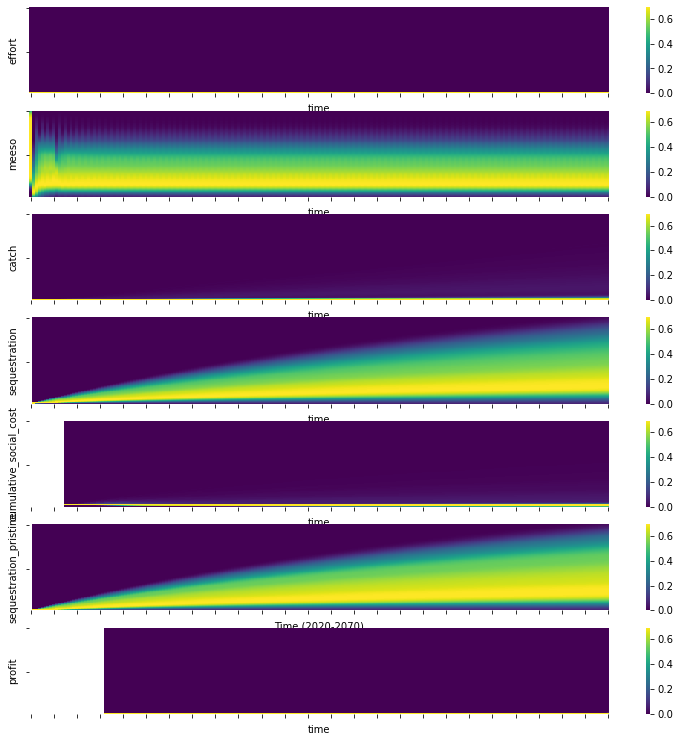

In [11]:
from ema_workbench.analysis.plotting import kde_over_time
import matplotlib.pyplot as plt

fig, axes = kde_over_time(experiments, outcomes, log=True)
ax = fig.get_axes()
fig.set_size_inches(13,13)

ax[5].set_xlabel('Time (2020-2070)')

plt.savefig('kde7_all4-withfishingnewmodel.png')


In [9]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes["sequestration"] < 1000
prim_alg = prim.Prim(x, y, threshold=1000)
box1 = prim_alg.find_box()
#print(y)

#print(outcomes["sequestration"])

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


PrimException: y is not a 1-d array

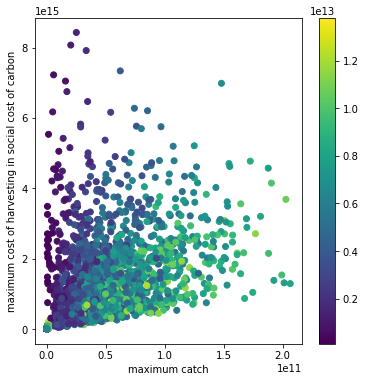

In [12]:
import matplotlib.pyplot as plt
import numpy as np

seq = outcomes['sequestration']
maxseq = np.max(seq, axis=1)

catch = outcomes['catch']
maxcatch = np.max(catch, axis=1)
scc = outcomes['cumulative_social_cost']
maxscc = np.max(scc, axis=1)

#print(maxscc)
#socialcost = (maxscc-2840053909602230)*-1
fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(maxcatch, maxscc,c=maxseq)
plt.colorbar(sc)
ax.set_xlabel('maximum catch')
ax.set_ylabel('maximum cost of harvesting in social cost of carbon')
#plt.show()

plt.savefig('correlation.png')



288578772133977.0
666755.9921875


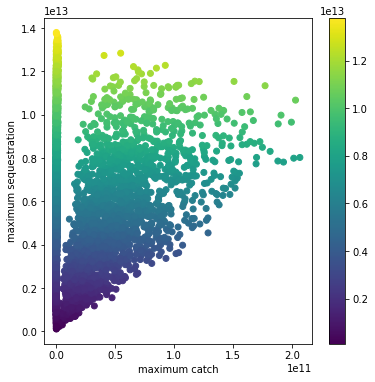

In [23]:
import matplotlib.pyplot as plt
import numpy as np

seq = outcomes['sequestration']
maxseq = np.max(seq, axis=1)
#maximum of set of outcomes
catch = outcomes['catch']
maxcatch = np.max(catch, axis=1)
scc = outcomes['cumulative_social_cost']
maxscc = np.max(scc, axis=1)

biomass = outcomes['meeso']
maxbiomass = np.max(biomass, axis=1)

print(np.mean(maxscc))
print(np.median(maxscc))

#print(maxscc)
#socialcost = (maxscc-2840053909602230)*-1
fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(maxcatch, maxseq,c=maxseq)
plt.colorbar(sc)
ax.set_xlabel('maximum catch')
ax.set_ylabel('maximum sequestration')
#plt.show()

plt.savefig('correlation2.png')

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

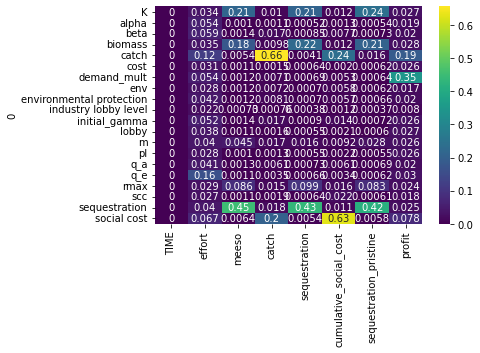

<Figure size 432x288 with 0 Axes>

In [27]:
from ema_workbench.analysis import feature_scoring
import seaborn as sns

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()
plt.savefig('feature.png')

In [15]:
print(results[Time>30])

NameError: name 'Time' is not defined

In [24]:
import pandas as pd

exp = pd.DataFrame(experiments)
social = pd.DataFrame(maxscc)
catch = pd.DataFrame(maxcatch)
seq = pd.DataFrame(maxseq)
biomass = pd.DataFrame(maxbiomass)


In [16]:
print(exp)
print(social)

                 K     alpha      beta          cost  demand_mult       env  \
0     3.835983e+09  0.097345  0.000003  22472.004094     1.219752  0.233581   
1     8.841032e+08  0.154506  0.000018  38527.058726     1.313382  0.329131   
2     1.031558e+09  0.037299  0.000016  29098.036026     1.497020  0.442730   
3     1.659192e+09  0.256520  0.000001  27002.930701     1.228328  0.279313   
4     1.676448e+09  0.152301  0.000006  15479.022204     1.454530  0.216918   
...            ...       ...       ...           ...          ...       ...   
9995  3.704655e+09  0.198805  0.000018  37129.100493     1.408810  0.406757   
9996  3.381729e+09  0.095558  0.000019  19764.953038     1.418712  0.286214   
9997  3.072225e+09  0.222170  0.000013  25899.326978     1.432536  0.555065   
9998  3.066390e+09  0.052032  0.000010  22371.231253     1.238400  0.485142   
9999  2.366511e+09  0.082987  0.000007  32756.949228     1.472308  0.761163   

      initial_gamma     lobby         m         pl 

In [25]:
exp['social cost']=social
exp['sequestration']=seq
exp['catch']=catch
exp['biomass']=biomass


exp['environmental protection'] = pd.cut(exp['env'], bins=[0, 0.5, 0.7, 1], labels=['high', 'moderate', 'low'])
exp['industry lobby level'] = pd.cut(exp['lobby'], bins=[0, 1.25, 1.4, 2], labels=['low', 'moderate', 'high'])

print(exp)


                 K     alpha      beta          cost  demand_mult       env  \
0     3.835983e+09  0.097345  0.000003  22472.004094     1.219752  0.233581   
1     8.841032e+08  0.154506  0.000018  38527.058726     1.313382  0.329131   
2     1.031558e+09  0.037299  0.000016  29098.036026     1.497020  0.442730   
3     1.659192e+09  0.256520  0.000001  27002.930701     1.228328  0.279313   
4     1.676448e+09  0.152301  0.000006  15479.022204     1.454530  0.216918   
...            ...       ...       ...           ...          ...       ...   
9995  3.704655e+09  0.198805  0.000018  37129.100493     1.408810  0.406757   
9996  3.381729e+09  0.095558  0.000019  19764.953038     1.418712  0.286214   
9997  3.072225e+09  0.222170  0.000013  25899.326978     1.432536  0.555065   
9998  3.066390e+09  0.052032  0.000010  22371.231253     1.238400  0.485142   
9999  2.366511e+09  0.082987  0.000007  32756.949228     1.472308  0.761163   

      initial_gamma     lobby         m         pl 

<AxesSubplot:xlabel='social cost', ylabel='environmental protection'>

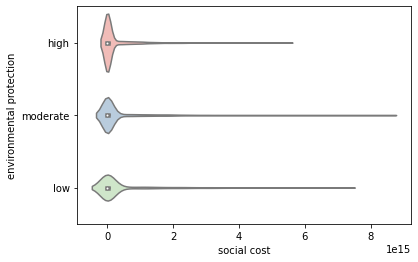

In [18]:
#print(exp.dtypes)

exp[['social cost']] = exp[['social cost']].apply(pd.to_numeric)
#print(exp.dtypes)
#exp = exp[exp['social cost']<500]
#g.map(sns.violinplot(x=exp['social cost'], palette="Pastel1"))
sns.violinplot(x=exp['social cost'], y=exp['environmental protection'], palette="Pastel1")

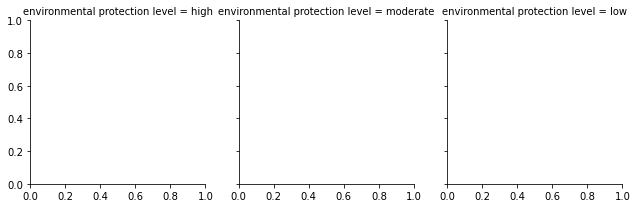

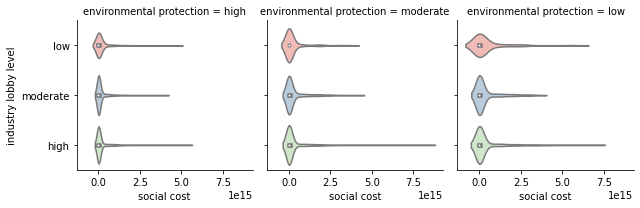

In [19]:
#g.map_dataframe(sns.violinplot("social cost", palette="Pastel1"))
g = sns.FacetGrid(exp, col="environmental protection")
g.map_dataframe(sns.violinplot, x="social cost", y="industry lobby level", palette="Pastel1")
plt.savefig('lobbyplot.png')


In [91]:
print(exp[['social cost']])

      social cost
0       21.407043
1       10.524658
2       16.549866
3       23.413025
4       11.468674
...           ...
9995    13.524841
9996    22.981262
9997    14.596893
9998     9.720268
9999    16.110764

[9997 rows x 1 columns]


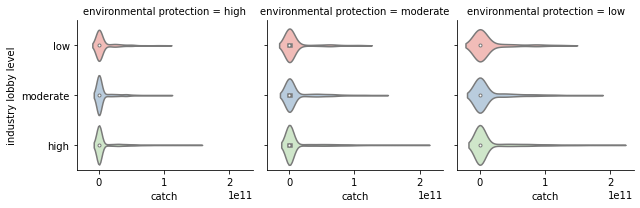

In [21]:
g = sns.FacetGrid(exp, col="environmental protection")
g.map_dataframe(sns.violinplot, x="catch", y="industry lobby level", palette="Pastel1")
plt.savefig('lobbyplot2.png')

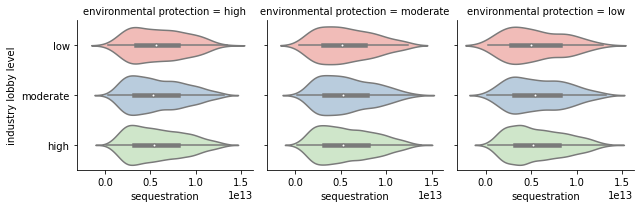

In [20]:
g = sns.FacetGrid(exp, col="environmental protection")
g.map_dataframe(sns.violinplot, x="sequestration", y="industry lobby level", palette="Pastel1")
plt.savefig('lobbyplot3.png')

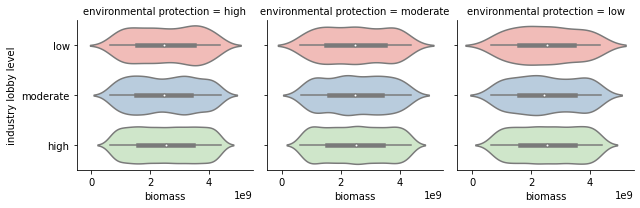

In [26]:
g = sns.FacetGrid(exp, col="environmental protection")
g.map_dataframe(sns.violinplot, x="biomass", y="industry lobby level", palette="Pastel1")
plt.savefig('lobbyplot4.png')

In [ ]:
#calculate the percentage of scenarios in which catch & effort are zero.